# Data Cleaning

this notebook contains data preprocessing techniques 

### Data Acquisition

In [92]:
rounds.sample(5)

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
20803,/company/plantsense,PlantSense,web,USA,CA,SF Bay,San Francisco,venture,2010-07-19,2010-07,2010-Q3,2010,2500000.0
17933,/company/nanosteel,NanoSteel,nanotech,USA,RI,Providence,Providence,venture,2011-10-18,2011-10,2011-Q4,2011,17000000.0
1911,/company/appistry-inc,Appistry,analytics,USA,MO,Saint Louis,St. Louis,series-c+,2009-01-01,2009-01,2009-Q1,2009,3000000.0
11404,/company/gr8erminds,Gr8erMinds,software,USA,IN,Indianapolis,Indianapolis,angel,2011-07-06,2011-07,2011-Q3,2011,4000.0
5094,/company/ce-interactive,CE Interactive,software,USA,NY,New York,New York,angel,2005-01-01,2005-01,2005-Q1,2005,NaN


Obtain 2013 snapshot data from [crunchbase.com](https://data.crunchbase.com/docs/2013-snapshot).

In [88]:
import pandas as pd
import numpy as np

In [89]:
#read obtained data
companies = pd.read_csv('data/crunchbase-companies.csv')
acquisitions = pd.read_csv('data/crunchbase-acquisitions.csv')
investments = pd.read_csv('data/crunchbase-investments.csv')
rounds = pd.read_csv('data/crunchbase-rounds.csv')

C:\Users\hp\ooo\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Data Cleaning and Exploring

In [90]:
companies.columns

17

In [4]:
companies.shape

(17727, 17)

Check null values based on columns

In [5]:
companies.isnull().sum()

permalink               0
name                    0
category_code         399
funding_total_usd    1505
status                  0
country_code            0
state_code            247
region                  0
city                  265
funding_rounds          0
founded_at           4051
founded_month        4051
founded_quarter      4051
founded_year         4051
first_funding_at      105
last_funding_at       105
last_milestone_at    7199
dtype: int64

**Drop** companies with no funding_total_usd or first_funding_at or category_code columns

In [6]:
companies = companies.dropna(subset=['first_funding_at'])
companies.reset_index(drop=True, inplace=True)
companies.shape

(17622, 17)

In [7]:
companies = companies.dropna(subset=['category_code'])
companies.reset_index(drop=True, inplace=True)
companies.shape

(17224, 17)

In [8]:
companies = companies.dropna(subset=['funding_total_usd'])
companies.reset_index(drop=True, inplace=True)
companies.shape

(15827, 17)

Change the data types

In [9]:
companies.dtypes

permalink             object
name                  object
category_code         object
funding_total_usd     object
status                object
country_code          object
state_code            object
region                object
city                  object
funding_rounds         int64
founded_at            object
founded_month         object
founded_quarter       object
founded_year         float64
first_funding_at      object
last_funding_at       object
last_milestone_at     object
dtype: object

before converting Funding_total_usd we should find noisy data. data that can't be converted to numeric values

In [10]:
x=pd.to_numeric(companies['funding_total_usd'], errors='coerce').isnull()

In [11]:
x= x.loc[lambda x : x!=False]
x

6866    True
6869    True
7099    True
7202    True
7309    True
7476    True
8101    True
8124    True
8170    True
8172    True
9672    True
9700    True
Name: funding_total_usd, dtype: bool

In [12]:
#example of noiy data
companies['funding_total_usd'].iloc[6866]

'5/18/27'

drop noisy data

In [13]:
x.shape

(12,)

In [14]:
indexes= x.index.tolist()

In [15]:
companies.drop(companies.index[indexes], inplace=True)

now that 'funding_total_usd' is cleaned, we can convert it to integer

In [16]:
companies['funding_total_usd']=  companies['funding_total_usd'].astype(str).astype(float)

Convert (first_funding_at,last_funding_at) to date data type

In [17]:
companies['first_funding_at'][30]

'2010-10-25'

In [18]:
import datetime as dt
companies['first_funding_at']= pd.to_datetime(companies['first_funding_at'], format="%Y-%m-%d").dt.date

In [19]:

companies['last_funding_at']= pd.to_datetime(companies['last_funding_at'],format="%Y-%m-%d").dt.date

In [20]:
companies['last_milestone_at']= pd.to_datetime(companies['last_milestone_at'],format="%Y-%m-%d").dt.date

In [21]:
companies['founded_at']= pd.to_datetime(companies['founded_at'],format="%Y-%m-%d").dt.date

In [22]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15815 entries, 0 to 15826
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          15815 non-null  object 
 1   name               15815 non-null  object 
 2   category_code      15815 non-null  object 
 3   funding_total_usd  15815 non-null  float64
 4   status             15815 non-null  object 
 5   country_code       15815 non-null  object 
 6   state_code         15608 non-null  object 
 7   region             15815 non-null  object 
 8   city               15612 non-null  object 
 9   funding_rounds     15815 non-null  int64  
 10  founded_at         12330 non-null  object 
 11  founded_month      12330 non-null  object 
 12  founded_quarter    12330 non-null  object 
 13  founded_year       12330 non-null  float64
 14  first_funding_at   15815 non-null  object 
 15  last_funding_at    15815 non-null  object 
 16  last_milestone_at  950

Explore the 'Status' column

In [23]:
companies.status.value_counts()


operating    13491
acquired      1495
closed         495
ipo            334
Name: status, dtype: int64

In [24]:
# See how many operating companies were last funded more than 2.5 years ago
companies[np.logical_and(
    np.logical_and(companies.last_funding_at < pd.to_datetime('2013'), companies.first_funding_at >  pd.to_datetime('2005')),
    companies.status == 'operating')]

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
0,/company/waywire,#waywire,news,1750000.0,operating,USA,NY,New York,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,2013-09-06
1,/company/n-plusn,#NAME?,software,600000.0,operating,USA,NY,New York,New York,1,2012-01-01,2012-01,2012-Q1,2012.0,2012-08-29,2012-08-29,NaT
4,/company/10-20-media,10-20 Media,ecommerce,750000.0,operating,USA,MD,Washington DC,Woodbine,2,2001-01-01,2001-01,2001-Q1,2001.0,2010-03-30,2011-12-28,NaT
8,/company/1010data,1010data,software,35000000.0,operating,USA,NY,New York,New York,1,2000-01-01,2000-01,2000-Q1,2000.0,2010-03-08,2010-03-08,2012-01-01
9,/company/10bestthings,10BestThings,web,50000.0,operating,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04,2009-Q2,2009.0,2009-04-01,2009-04-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15815,/company/zyga-technology,Zyga Technology,medical,25000000.0,operating,USA,MN,Minneapolis,Minnetonka,1,NaT,NaN,NaN,NaN,2012-05-16,2012-05-16,NaT
15817,/company/zykis,Zykis,public_relations,800000.0,operating,USA,CA,Los Angeles,Irvine,1,2006-10-27,2006-10,2006-Q4,2006.0,2006-10-27,2006-10-27,NaT
15819,/company/zymetis,Zymetis,biotech,2257464.0,operating,USA,MD,Washington DC,College Park,2,2006-01-01,2006-01,2006-Q1,2006.0,2010-01-11,2010-01-31,NaT
15821,/company/zyngenia,Zyngenia,biotech,25000000.0,operating,USA,MD,Washington DC,Gaithersburg,1,2008-01-01,2008-01,2008-Q1,2008.0,2010-09-09,2010-09-09,NaT


Create new dataframe which contains only rows with status = (IPO, Acuaired, closed) 

In [25]:
# Create dataset containing only companies that failed or succeeded

current_date = companies.last_funding_at.max()

nonoperating_companies = companies[np.logical_or(
    companies.status != 'operating',
    np.logical_and(
        np.logical_and(
            companies.status == 'operating',
            companies.first_funding_at >
            current_date - pd.offsets.DateOffset(years=10)),
        companies.last_funding_at < current_date -
        pd.offsets.DateOffset(years=2, months=6)))].reset_index()

In [26]:
nonoperating_companies['status'].unique()

array(['acquired', 'operating', 'closed', 'ipo'], dtype=object)

In [27]:
nonoperating_companies.head()

,index,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
0,5,/company/1000memories,1000memories,web,2535000.0,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,2013-07-04
1,7,/company/100plus,100Plus,analytics,1250000.0,acquired,USA,CA,SF Bay,San Francisco,2,2011-09-16,2011-09,2011-Q3,2011.0,2011-11-02,2011-11-30,2013-02-27
2,8,/company/1010data,1010data,software,35000000.0,operating,USA,NY,New York,New York,1,2000-01-01,2000-01,2000-Q1,2000.0,2010-03-08,2010-03-08,2012-01-01
3,9,/company/10bestthings,10BestThings,web,50000.0,operating,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04,2009-Q2,2009.0,2009-04-01,2009-04-01,NaT
4,12,/company/11i-solutions,11i Solutions,enterprise,1800000.0,closed,USA,AL,Huntsville,Huntsville,1,NaT,NaN,NaN,NaN,2011-03-22,2011-03-22,NaT


In [28]:
nonoperating_companies.drop(columns='index', axis=1, inplace=True)

In [29]:
nonoperating_companies.status.value_counts()

operating    3866
acquired     1495
closed        495
ipo           334
Name: status, dtype: int64

In [30]:
nonoperating_companies.shape

(6190, 17)

Create boolean classifier, 'succeed' which equals to 1 if companie is aquired/ipo. and equals to 0 if company's status= closed

In [31]:
nonoperating_companies['succeed'] = np.nan

In [32]:
#fill the column
nonoperating_companies.loc[np.logical_or(nonoperating_companies.status == 'closed', nonoperating_companies.
    status == 'operating'), 'succeed'] = 0
nonoperating_companies.loc[np.logical_or(
    nonoperating_companies.status == 'ipo', nonoperating_companies.status
    == 'acquired'), 'succeed'] = 1

In [33]:
nonoperating_companies.succeed.value_counts()

0.0    4361
1.0    1829
Name: succeed, dtype: int64

In [34]:
nonoperating_companies.columns

Index(['permalink', 'name', 'category_code', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'last_milestone_at', 'succeed'],
      dtype='object')

# Rounds

In [35]:
rounds.columns

Index(['company_permalink', 'company_name', 'company_category_code',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'funding_round_type', 'funded_at', 'funded_month',
       'funded_quarter', 'funded_year', 'raised_amount_usd'],
      dtype='object')

In [36]:
rounds.shape

(31679, 13)

In [37]:
rounds.dtypes

company_permalink         object
company_name              object
company_category_code     object
company_country_code      object
company_state_code        object
company_region            object
company_city              object
funding_round_type        object
funded_at                 object
funded_month              object
funded_quarter            object
funded_year                int64
raised_amount_usd        float64
dtype: object

In [38]:
rounds['funded_at'].sample(1)

21997    2005-07-18
Name: funded_at, dtype: object

In [39]:
rounds['funded_at']= pd.to_datetime(rounds['funded_at'], format="%Y-%m-%d")

In [40]:
rounds['funding_round_type'].unique()

array(['series-a', 'angel', 'series-b', 'venture', 'other', 'series-c+',
       'private-equity', 'post-ipo', 'crowdfunding'], dtype=object)

# Feature Engineering

Drop rounds that doesn'thave a corresponding row in Non-operating Companies dataframe

In [41]:
nonoperating_companies.columns

Index(['permalink', 'name', 'category_code', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'last_milestone_at', 'succeed'],
      dtype='object')

In [42]:
nonoperating_names = nonoperating_companies['permalink']

In [43]:
rounds_c =rounds[rounds['company_permalink'].isin(nonoperating_names)]

In [44]:
rounds_c.shape

(10501, 13)

**Average Time between Rounds**

In [45]:
rounds_c.sort_values(by=['company_name', 'funded_at'],ascending=True,inplace=True)

<ipython-input-45-1b0af6b6d946>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rounds_c.sort_values(by=['company_name', 'funded_at'],ascending=True,inplace=True)


In [46]:
# Create column for time between rounds
rounds_c['time_between_next_round'] = rounds_c.groupby('company_name').funded_at.diff()

<ipython-input-46-400690d5facc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rounds_c['time_between_next_round'] = rounds_c.groupby('company_name').funded_at.diff()


In [47]:
rounds_c.sample(3)

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,time_between_next_round
20675,/company/pipeline-micro,Pipeline Micro,hardware,USA,HI,Honolulu,Honolulu,series-a,2009-01-12,2009-01,2009-Q1,2009,7000000.0,NaT
6972,/company/crossing-automation,Crossing Automation,semiconductor,USA,CA,SF Bay,Mountain View,series-b,2009-09-02,2009-09,2009-Q3,2009,6500000.0,485 days
22413,/company/recyclematch,RecycleMatch,enterprise,USA,TX,Houston,Houston,angel,2010-10-15,2010-10,2010-Q4,2010,600000.0,167 days


In [48]:
rounds_c['time_between_next_round'].fillna(pd.Timedelta(seconds=0), inplace=True)

C:\Users\hp\ooo\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [49]:
# Calculate average time between rounds and average round amount raised ($)

avg_round_time_amount = rounds_c.groupby('company_name').agg({
    'time_between_next_round':
    pd.Series.mean,
    'raised_amount_usd':
    'mean'
}).rename(
    columns={
        'time_between_next_round': 'avg_time_bw_rounds',
        'raised_amount_usd': 'avg_raise_usd'
    }).reset_index()

In [50]:
# Merge into main df

nonoperating_companies = nonoperating_companies.merge(
    avg_round_time_amount, how='left', left_on='name', right_on='company_name')

In [51]:
nonoperating_companies.sample(5)

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,succeed,company_name,avg_time_bw_rounds,avg_raise_usd
4008,/company/pgp-trustcenter,PGP TrustCenter,security,8500000.0,operating,USA,MA,Boston,Newton,1,...,1997-01,1997-Q1,1997.0,2007-05-29,2007-05-29,2009-09-14,0.0,PGP TrustCenter,0 days,8500000.0
583,/company/bbs-technologies,BBS Technologies,software,8000000.0,operating,USA,TX,Houston,Houston,1,...,2000-01,2000-Q1,2000.0,2006-04-21,2006-04-21,2002-01-01,0.0,BBS Technologies,0 days,8000000.0
2421,/company/hyper9,Hyper9,software,15200000.0,acquired,USA,TX,Austin,Austin,3,...,2006-01,2006-Q1,2006.0,2007-07-16,2009-02-26,NaT,1.0,Hyper9,197 days,7600000.0
4830,/company/skydata-systems,SkyData Systems,mobile,4000000.0,operating,USA,CA,SF Bay,San Mateo,1,...,NaN,NaN,NaN,2008-05-28,2008-05-28,NaT,0.0,SkyData Systems,0 days,4000000.0
2818,/company/kickfire,Kickfire,software,20000000.0,operating,USA,CA,SF Bay,Santa Clara,1,...,2006-01,2006-Q1,2006.0,2008-07-31,2008-07-31,2010-08-10,0.0,Kickfire,0 days,20000000.0


**time between first and second round**

In [52]:

# Create column in main df
nonoperating_companies['time_bw_first_rounds'] = dt.timedelta(0)

for company in rounds_c.company_name.unique():
    if len(rounds_c[rounds_c.company_name ==
                           company].funded_at) > 1:
        nonoperating_companies.loc[
            nonoperating_companies.name ==
            company, 'time_bw_first_rounds'] = rounds_c[
                rounds_c.company_name == company].funded_at.values[
                    1] - rounds_c[rounds_c.company_name ==
                                         company].funded_at.values[0]

In [53]:
nonoperating_companies.columns

Index(['permalink', 'name', 'category_code', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'last_milestone_at', 'succeed',
       'company_name', 'avg_time_bw_rounds', 'avg_raise_usd',
       'time_bw_first_rounds'],
      dtype='object')

### Feature: categories

In [54]:
# Fill empty category with 'unknown'
nonoperating_companies.category_code.fillna('unknown_category', inplace=True)


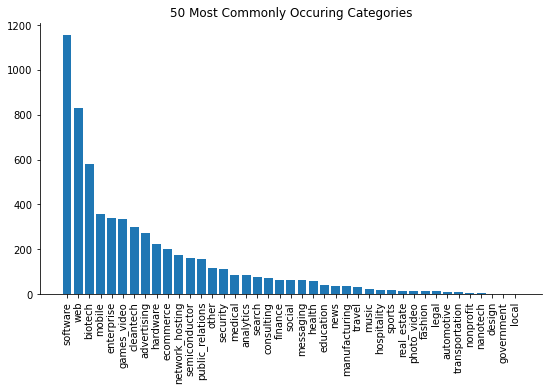

In [56]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Create list of category lists
categories = list(nonoperating_companies.category_code)
# Flatten the list
# Count occurences of each
category_counts = Counter(categories).most_common()
# Look at the distribution
plt.figure(figsize=(9, 5))
plt.bar([x[0] for x in category_counts[0:50]],
        [x[1] for x in category_counts[0:50]],
        width=0.8)
plt.xticks(rotation=90)
plt.title('50 Most Commonly Occuring Categories')
sns.despine()

take only the top 6 and assign other to "OtherCategory"

In [65]:
top_6_categories= [x[0] for x in category_counts[0:6]]
top_6_categories

['software', 'web', 'biotech', 'mobile', 'enterprise', 'games_video']

In [66]:
nonoperating_companies.loc[~nonoperating_companies.category_code.isin(top_6_categories), 'category_code'] = 'OtherCategory'

In [67]:
nonoperating_companies.category_code.unique()

array(['web', 'OtherCategory', 'software', 'enterprise', 'games_video',
       'biotech', 'mobile'], dtype=object)

### Feature: State


In [68]:
#fill misiing values
nonoperating_companies.state_code.fillna('unknown_state', inplace=True)

In [69]:
nonoperating_companies.state_code.unique()

array(['CA', 'NY', 'OH', 'AL', 'MA', 'FL', 'unknown_state', 'CO', 'TX',
       'IA', 'GA', 'SC', 'WA', 'NC', 'WI', 'MN', 'KS', 'MD', 'IL', 'OR',
       'AZ', 'CT', 'MI', 'IN', 'PA', 'NJ', 'MO', 'RI', 'ME', 'VA', 'TN',
       'NE', 'NH', 'DE', 'UT', 'DC', 'LA', 'AR', 'HI', 'KY', 'NV', 'NM',
       'MT', 'MS', 'OK', 'SD', 'VT', 'WY', 'WV', 'ID', 'ND'], dtype=object)

Text(0.5, 1.0, 'Distribution of Top 10 States')

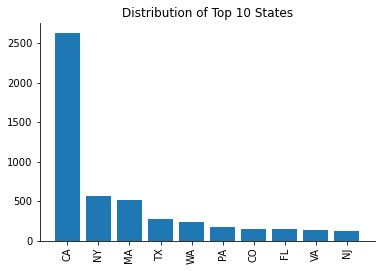

In [70]:
# Look at distribution
states_dist = nonoperating_companies.groupby(
    'state_code').size().sort_values(ascending=False)
plt.bar(states_dist[0:10].index, height=states_dist[0:10].values)
plt.xticks(rotation=90)
sns.despine()
plt.title('Distribution of Top 10 States')

take the top 4 states and replace others with "OtherState"

In [77]:
top_4_states= list(states_dist[0:4].index)
top_4_states

['CA', 'NY', 'MA', 'TX']

In [78]:
nonoperating_companies.loc[~nonoperating_companies.state_code.isin(top_4_states), 'state_code'] = 'OtherState'

In [79]:
nonoperating_companies.state_code.unique()

array(['CA', 'NY', 'OtherState', 'MA', 'TX'], dtype=object)

**Cleaning up date info**

In [80]:
nonoperating_companies.time_bw_first_rounds.replace(to_replace=dt.timedelta(days=0),
                                value=np.nan,
                                inplace=True)

In [81]:
# Convert timedelta columns to float values for classification models
nonoperating_companies['float_avg_time_bw_rounds'] = nonoperating_companies.avg_time_bw_rounds.dt.days
nonoperating_companies['float_time_bw_first_rounds'] = nonoperating_companies.time_bw_first_rounds.dt.days

# Outliers

In [82]:
df_size = nonoperating_companies.shape

In [83]:
nonoperating_companies.sample(10)

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,first_funding_at,last_funding_at,last_milestone_at,succeed,company_name,avg_time_bw_rounds,avg_raise_usd,time_bw_first_rounds,float_avg_time_bw_rounds,float_time_bw_first_rounds
4525,/company/rollbase,Rollbase,enterprise,300000.0,acquired,USA,CA,SF Bay,Saratoga,1,...,2007-08-01,2007-08-01,2013-04-29,1.0,Rollbase,0 days 00:00:00,300000.0,NaT,0,NaN
1150,/company/colubris,Colubris Networks,OtherCategory,29000000.0,acquired,USA,MA,Boston,Waltham,2,...,2005-03-08,2006-10-23,2007-05-01,1.0,Colubris Networks,297 days 00:00:00,14500000.0,594 days,297,594.0
5498,/company/transparency-software,Transparency Software,software,12050000.0,operating,USA,CA,SF Bay,Palo Alto,2,...,2005-03-09,2007-07-01,NaT,0.0,Transparency Software,422 days 00:00:00,6025000.0,844 days,422,844.0
5678,/company/vast-systems-technology,VaST Systems Technology,software,24000000.0,operating,USA,CA,SF Bay,Sunnyvale,2,...,2005-05-23,2007-07-24,NaT,0.0,VaST Systems Technology,396 days 00:00:00,12000000.0,792 days,396,792.0
4757,/company/si2-microsystems,Si2 Microsystems,OtherCategory,12700000.0,operating,USA,CA,SF Bay,San Jose,1,...,2009-02-04,2009-02-04,NaT,0.0,Si2 Microsystems,0 days 00:00:00,12700000.0,NaT,0,NaN
3025,/company/logical-apps,Logical Apps,software,14000000.0,operating,USA,CA,Los Angeles,Irvine,1,...,2005-10-11,2005-10-11,2008-01-01,0.0,Logical Apps,0 days 00:00:00,14000000.0,NaT,0,NaN
4987,/company/southwest-nanotechnologies,Southwest Nanotechnologies,OtherCategory,3000000.0,operating,USA,OtherState,Norman,Norman,1,...,2009-07-07,2009-07-07,NaT,0.0,Southwest Nanotechnologies,0 days 00:00:00,3000000.0,NaT,0,NaN
621,/company/bez-systems,BEZ Systems,software,11100000.0,operating,USA,MA,Boston,Boston,2,...,2005-01-05,2006-09-18,2011-01-11,0.0,BEZ Systems,310 days 12:00:00,5550000.0,621 days,310,621.0
556,/company/b-bridge-international,B-Bridge International,biotech,4200000.0,operating,USA,CA,SF Bay,Cupertino,1,...,2005-03-29,2005-03-29,NaT,0.0,B-Bridge International,0 days 00:00:00,4200000.0,NaT,0,NaN
2175,/company/globalscholar-com,globalscholar.com,OtherCategory,27000000.0,acquired,USA,OtherState,Seattle,Bellevue,1,...,2008-02-04,2008-02-04,NaT,1.0,globalscholar.com,0 days 00:00:00,27000000.0,NaT,0,NaN


In [84]:
nonoperating_companies.describe()

,funding_total_usd,funding_rounds,founded_year,succeed,avg_time_bw_rounds,avg_raise_usd,time_bw_first_rounds,float_avg_time_bw_rounds,float_time_bw_first_rounds
count,6.190000e+03,6190.000000,4905.000000,6190.000000,6190,6.189000e+03,2348,6190.000000,2348.000000
mean,2.014531e+07,1.700323,2003.906014,0.295477,114 days 12:05:43.684063916,1.087627e+07,514 days 07:24:01.226575808,114.393053,514.308348
std,1.077718e+08,1.184342,6.788966,0.456294,197 days 20:24:25.258749896,4.575237e+07,535 days 19:48:27.896268104,197.742615,535.825323
min,2.910000e+02,1.000000,1906.000000,0.000000,0 days 00:00:00,2.910000e+02,1 days 00:00:00,0.000000,1.000000
25%,1.100000e+06,1.000000,2001.000000,0.000000,0 days 00:00:00,1.000000e+06,232 days 00:00:00,0.000000,232.000000
50%,5.500000e+06,1.000000,2005.000000,0.000000,0 days 00:00:00,4.000000e+06,426 days 00:00:00,0.000000,426.000000
75%,1.673750e+07,2.000000,2008.000000,1.000000,207 days 00:00:00,1.000000e+07,691 days 06:00:00,207.000000,691.250000
max,5.700000e+09,13.000000,2013.000000,1.000000,4676 days 18:00:00,1.992525e+09,18002 days 00:00:00,4676.000000,18002.000000


Text(0.5, 1.0, 'Total Raise Amount')

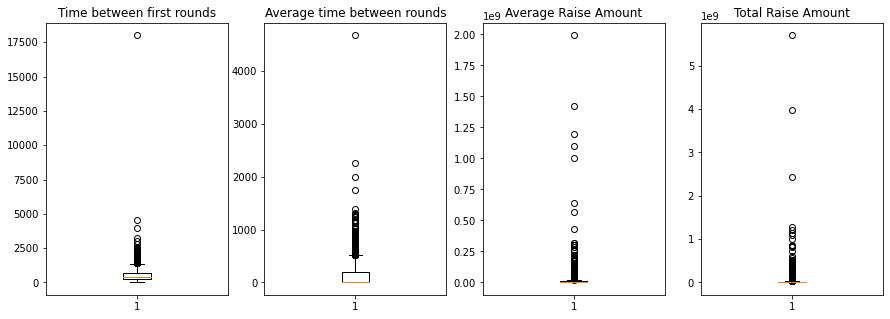

In [85]:
plt.subplots(1, 4, figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.boxplot(
    nonoperating_companies.float_time_bw_first_rounds[nonoperating_companies.float_time_bw_first_rounds.notnull()])
plt.title('Time between first rounds')
plt.subplot(1, 4, 2)
plt.boxplot(nonoperating_companies.float_avg_time_bw_rounds[nonoperating_companies.float_avg_time_bw_rounds.notnull()])
plt.title('Average time between rounds')
plt.subplot(1, 4, 3)
plt.boxplot(nonoperating_companies.avg_raise_usd[nonoperating_companies.avg_raise_usd.notnull()])
plt.title('Average Raise Amount')
plt.subplot(1, 4, 4)
plt.boxplot(nonoperating_companies.funding_total_usd[nonoperating_companies.funding_total_usd.notnull()])
plt.title('Total Raise Amount')

# --------------------------------------

In [86]:
acquisitions.columns

Index(['company_permalink', 'company_name', 'company_category_code',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'acquirer_permalink', 'acquirer_name',
       'acquirer_category_code', 'acquirer_country_code',
       'acquirer_state_code', 'acquirer_region', 'acquirer_city',
       'acquired_at', 'acquired_month', 'acquired_quarter', 'acquired_year',
       'price_amount', 'price_currency_code'],
      dtype='object')

In [115]:
investments.columns

Index(['company_permalink', 'company_name', 'company_category_code',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'investor_permalink', 'investor_name',
       'investor_category_code', 'investor_country_code',
       'investor_state_code', 'investor_region', 'investor_city',
       'funding_round_type', 'funded_at', 'funded_month', 'funded_quarter',
       'funded_year', 'raised_amount_usd'],
      dtype='object')

In [ ]:
companies['state_code'].unique()

In [ ]:
len(companies['state_code'].unique())

In [ ]:

acquisitions['company_state_code'].unique()

In [ ]:
len(acquisitions['company_state_code'].unique())

In [ ]:
companies['permalink'][500:520]

In [ ]:
companies['name'][500:520]

In [87]:
nonoperating_companies.to_csv('companies.csv')